### Importing libraries

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from keplergl import KeplerGl

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('NY_CitiBike_data.csv', index_col = 0)

## Data preprocessing

In [3]:
# Create a value column and group by start and end station 
df["value"] = 1
df_group = df.groupby(["start_station_name", "end_station_name","start_lat","start_lng",
                      "end_lat","end_lng"])["value"].count().reset_index()

In [4]:
df_group

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,value
0,1 Ave & E 110 St,1 Ave & E 110 St,40.792062,-73.937756,40.792327,-73.938300,1
1,1 Ave & E 110 St,1 Ave & E 110 St,40.792078,-73.937701,40.792327,-73.938300,1
2,1 Ave & E 110 St,1 Ave & E 110 St,40.792142,-73.937926,40.792327,-73.938300,1
3,1 Ave & E 110 St,1 Ave & E 110 St,40.792144,-73.937845,40.792327,-73.938300,1
4,1 Ave & E 110 St,1 Ave & E 110 St,40.792175,-73.937893,40.792327,-73.938300,1
...,...,...,...,...,...,...,...
5111359,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687181,-74.016553,40.687066,-74.016756,1
5111360,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687197,-74.016486,40.687066,-74.016756,1
5111361,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687216,-74.016586,40.687066,-74.016756,1
5111362,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687234,-74.016551,40.687066,-74.016756,1


In [5]:
print(df_group['value'].sum())
print(df.shape)

30613517
(30613517, 18)


In [6]:
df_group.rename(columns = {'value': 'trips'}, inplace = True)

In [7]:
df_group

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trips
0,1 Ave & E 110 St,1 Ave & E 110 St,40.792062,-73.937756,40.792327,-73.938300,1
1,1 Ave & E 110 St,1 Ave & E 110 St,40.792078,-73.937701,40.792327,-73.938300,1
2,1 Ave & E 110 St,1 Ave & E 110 St,40.792142,-73.937926,40.792327,-73.938300,1
3,1 Ave & E 110 St,1 Ave & E 110 St,40.792144,-73.937845,40.792327,-73.938300,1
4,1 Ave & E 110 St,1 Ave & E 110 St,40.792175,-73.937893,40.792327,-73.938300,1
...,...,...,...,...,...,...,...
5111359,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687181,-74.016553,40.687066,-74.016756,1
5111360,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687197,-74.016486,40.687066,-74.016756,1
5111361,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687216,-74.016586,40.687066,-74.016756,1
5111362,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687234,-74.016551,40.687066,-74.016756,1


In [8]:
# Sample a subset of the data (e.g., 0.1% of the original data)
sample_fraction = 0.001  
df_group_sampled = df_group.sample(frac=sample_fraction, random_state=1)

In [9]:
df_group_sampled

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trips
2088834,E 33 St & 5 Ave,E 33 St & 5 Ave,40.747595,-73.984934,40.747659,-73.984907,1
284554,3 Ave & E 172 St,Grand Concourse & E Mosholu Pkwy S,40.839586,-73.900277,40.877964,-73.884755,1
1274697,Broadway\t& W 48 St,E 45 St & 3 Ave,40.760324,-73.984495,40.752554,-73.972826,1
2110052,E 39 St & Lexington Ave,E 39 St & Lexington Ave,40.749288,-73.976877,40.749499,-73.977292,1
715036,8 Ave & W 38 St,W 35 St & 8 Ave,40.754551,-73.991729,40.752762,-73.992805,1
...,...,...,...,...,...,...,...
2133943,E 40 St & Park Ave,E 32 St & Park Ave,40.750462,-73.978569,40.745712,-73.981948,1
370330,34 St & 35 Ave,8 Ave & W 33 St,40.756933,-73.926223,40.751551,-73.993934,5
3278207,Madison Av & E 51 St,Sands St & Jay St,40.758873,-73.975014,40.700119,-73.986200,1
5068242,Willoughby Ave & Wyckoff Ave,Lewis Ave & Kosciuszko St,40.705577,-73.921495,40.692371,-73.937054,1


## Plot the map

In [10]:
df_group_sampled.to_csv('df_group_locations_for_map.csv')

In [11]:
# Create KeplerGl instance

m = KeplerGl(height = 700)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [12]:
m.add_data(data=df_group_sampled,name="trip_data")

In [13]:
m

KeplerGl(data={'trip_data': {'index': [2088834, 284554, 1274697, 2110052, 715036, 1462223, 3868917, 4311836, 4…

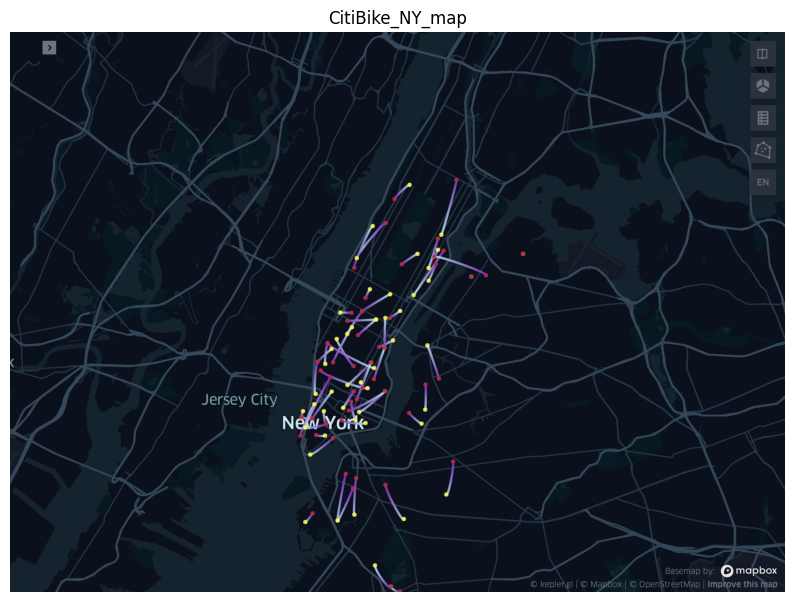

In [14]:
from PIL import Image
# Load the image
image_path = '/Users/prateeksharma/Downloads/1.png'  
image = Image.open(image_path)

# Display the image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('CitiBike_NY_map')
# Save the figure as a PNG file
plt.savefig('CitiBike_NY_map.png', format='png', bbox_inches='tight')
plt.show()

The map illustrates various linear routes overlaid on the city’s geographical layout, highlighting the movement of bike rides. It is noteworthy that Central Park has fewer bike rides compared to other areas in New York City. Bike-sharing in Central Park may be limited due to its large and varied terrain, which can be challenging for biking, and the park is often crowded with pedestrians. Safety concerns in certain areas and seasonal weather conditions also impact ridership. Additionally, the park's layout and the availability of existing transportation options may reduce the demand for bike-sharing services within the park itself. This observation warrants further investigation to understand the underlying reasons behind the relatively low number of bike rides in such a spacious and prominent urban park.

In [18]:
config = m.config

In [19]:
m.save_to_html(file_name='NY_Trips_Aggregated.html', read_only = False, config = config)

Map saved to NY_Trips_Aggregated.html!


In [20]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)